```https://github.com/kokhnovich/system-solver``` - весь код

Код для решения заданий лабораторной работы и текстовые файлы логов находятся в файлах cma_lab_tasks.cpp и hw_solver.h и папке lab.

Некоторые методы могут быть вызваны из кода всего репозитория. Эти методы соответствуют названию.

**Задание 1**. Алгоритм.
Реализуем свою версию Гаусса, которая не будет отнимать нулевые элементы.
Т.е. идем Гауссом по всем строкам. У текущей строки не более $min(n, i + 2)$ элементов, где и - номер строки.
И от каждой строки ниже этой отнимаем эту строку, умноженную на коэффициент, равный первый\_элемент\_нижней\_строки/первый\_элемент\_опорной\_строки (мы рассматриваем как бы подматрицу, поэтому первый элемент в строке - есть первый ненулевой элемент, т.е элемент с индексом номера опорной строки).

Если в процессе гаусса натыкаемся на 0, но сначала ищем строку с ненулевым элементом. Если такого элемента нет, то Система имеет бесконечно много решений или не имеет решений вообще.

В результате получится матрица с главной диагональю, 1 элементом над каждым из главной диагонали, и остальные нули.
Обратным ходом гаусса занулим элементы выше диагонали, и разделим строки на элемент в них, чтобы слева получить единичную матрицу.

Асимптотическая сложность алгоритма - $O(n^3)$.

Для эффективности реализовал распараллеливание с помощью std::async для вычитания строк из опорной строки. Также не храним и не отнимаем априори нулевые элементы. Также компилируем с флагом -О2 и -lpthread.

Так, за 57,3 секунд решается матрица размером 7500(все проверил перемножением(перемножение без потоков заняло больше 200 секунд)).

```For size=4000 is : 9062 ms
For size=4500 is : 12771 ms
For size=5000 is : 17263 ms
For size=5500 is : 22633 ms
For size=6000 is : 29105 ms
For size=6500 is : 36770 ms
For size=7000 is : 45356 ms
For size=7100 is : 46968 ms
For size=7200 is : 49767 ms
For size=7300 is : 52858 ms
For size=7400 is : 55163 ms
For size=7500 is : 57317 ms```

**Задание 2**. Просто пишем метод нахождения LU c выбором по столбцу. Вместо хранения полной матрицы D можно хранить вектор: i-ый элемент - номер строки исходной матрицы, которая должна быть на i-ой позиции(0-numeration).

Ответы для примеров:
1. $
A=\scriptsize\begin{bmatrix}
    -3 &      4 &      2 &     -3 &      2 &      3 &      4 &      3 \\
    -3 &      4 &     -1 &      1 &     -4 &     -5 &     -1 &      0 \\
    -6 &      8 &      1 &     -1 &      1 &      3 &     -3 &     -5  \\
   -12 &     16 &      2 &     -3 &      4 &     -2 &     -3 &      4  \\
   -24 &     32 &      4 &     -6 &      3 &     -3 &     -1 &     -2  \\
   -48 &     64 &      8 &    -12 &      6 &     -4 &      3 &     -3  \\
   -96 &    128 &     16 &    -24 &     12 &     -8 &     -1 &      4  \\
     2 &     -1 &     -3 &     -4 &     -5 &      4 &      1 &     -5  \\
\end{bmatrix} 
\\
b = \scriptsize\begin{bmatrix}
    79 &    -51 &    -29 &     33 &      2 &     59 &    149 &    -59  \\
\end{bmatrix}^T
\\
x = \scriptsize\begin{bmatrix}
     1 &      2 &      3 &      4 &      5 &      6 &      7 &      8  \\
\end{bmatrix}
\\
L = \scriptsize\begin{bmatrix}
   -96 &      0 &      0 &      0 &      0 &      0 &      0 &      0  \\
     2 & 1.66667 &      0 &      0 &      0 &      0 &      0 &      0\\
    -3 &      0 &    1.5 &      0 &      0 &      0 &      0 &      0  \\
    -6 &      0 &      0 &    0.5 &      0 &      0 &      0 &      0  \\
   -12 &      0 &      0 &      0 &    2.5 &      0 &      0 &      0  \\
   -24 &      0 &      0 &      0 &      0 &     -1 &      0 &      0  \\
    -3 &      0 &   -1.5 &   -0.5 &   -2.5 &      1 &   -3.5 &      0  \\
   -48 &      0 &      0 &      0 &      0 &      0 &    3.5 &     -7  \\
\end{bmatrix}
\\
U = \scriptsize\begin{bmatrix}
     1 & -1.33333 & -0.166667 &   0.25 & -0.125 & 0.0833333 & 0.0104167 & -0.0416667  \\
     0 &      1 &   -1.6 &   -2.7 &  -2.85 &    2.3 & 0.5875 &  -2.95  \\
     0 &      0 &      1 &   -1.5 & 1.08333 & 2.16667 & 2.6875 & 1.91667  \\
     0 &      0 &      0 &      1 &    0.5 &      7 & -5.875 &  -10.5  \\
     0 &      0 &      0 &      0 &      1 &   -0.4 &  -1.15 &    1.4  \\
     0 &      0 &      0 &      0 &      0 &      1 &   0.75 &      3  \\
     0 &      0 &      0 &      0 &      0 &      0 &      1 & 0.571429  \\
     0 &      0 &      0 &      0 &      0 &      0 &      0 &      1  \\
\end{bmatrix}
\\
D = \scriptsize\begin{bmatrix}
         2 &          6 &          3 &          4 &          5 &          7 &          0 &          1 \\
\end{bmatrix}
$

$ 2.
A = \scriptsize\begin{bmatrix}
     1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 &      1  \\
     1 &      2 &      4 &      8 &     16 &     32 &     64 &    128 &    256  \\
     1 &      3 &      9 &     27 &     81 &    243 &    729 &   2187 &   6561  \\
     1 &      4 &     16 &     64 &    256 &   1024 &   4096 &  16384 &  65536  \\
     1 &      5 &     25 &    125 &    625 &   3125 &  15625 &  78125 & 390625  \\
     1 &      6 &     36 &    216 &   1296 &   7776 &  46656 & 279936 & 1.67962e+06  \\
     1 &      7 &     49 &    343 &   2401 &  16807 & 117649 & 823543 & 5.7648e+06  \\
     1 &      8 &     64 &    512 &   4096 &  32768 & 262144 & 2.09715e+06 & 1.67772e+07  \\
     1 &      9 &     81 &    729 &   6561 &  59049 & 531441 & 4.78297e+06 & 4.30467e+07  \\
\end{bmatrix}
\\
b = \scriptsize\begin{bmatrix}
     9 &    511 &   9841 &  87381 & 488281 & 2.01554e+06 & 6.7256e+06 & 1.9174e+07 & 4.84276e+07  \\
\end{bmatrix}^T
\\
x = \scriptsize\begin{bmatrix}
     1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 \\
\end{bmatrix}
\\
L = \scriptsize\begin{bmatrix}
     1 &      0 &      0 &      0 &      0 &      0 &      0 &      0 &      0  \\
     1 &      8 &      0 &      0 &      0 &      0 &      0 &      0 &      0  \\
     1 &      4 &    -16 &      0 &      0 &      0 &      0 &      0 &      0  \\
     1 &      2 &    -12 &     24 &      0 &      0 &      0 &      0 &      0  \\
     1 &      7 &     -7 &    -21 &   -105 &      0 &      0 &      0 &      0  \\
     1 &      1 &     -7 &     21 &    -21 &    126 &      0 &      0 &      0  \\
     1 &      6 &    -12 &    -24 &    -96 &     96 &    480 &      0 &      0  \\
     1 &      5 &    -15 &    -15 &    -45 &     90 &    360 &   -360 &      0  \\
     1 &      3 &    -15 &     15 &     15 &    -60 &   -120 &    360 &   -720  \\
\end{bmatrix}
\\
U = \scriptsize\begin{bmatrix}
     1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 &      1  \\
     0 &      1 &     10 &     91 &    820 &   7381 &  66430 & 597871 & 5.38084e+06  \\
     0 &      0 &      1 &     15 &    166 &   1650 &  15631 & 144585 & 1.3208e+06  \\
     0 &      0 &      0 &      1 &     18 &    220 &   2310 &  22561 & 212268  \\
     0 &      0 &      0 &      0 &      1 &     26 &    428 &   5734 &  68433  \\
     0 &      0 &      0 &      0 &      0 &      1 &     28 &    484 &   6702  \\
     0 &      0 &      0 &      0 &      0 &      0 &      1 &     35 &    729  \\
     0 &      0 &      0 &      0 &      0 &      0 &      0 &      1 &     41  \\
     0 &      0 &      0 &      0 &      0 &      0 &      0 &      0 &      1  \\
\end{bmatrix}
\\
D = \scriptsize\begin{bmatrix}
     0 &      5 &      3 &      8 &      2 &      7 &      6 &      4 &      1  \\
\end{bmatrix}
$

Число обусловленности означает, что при небольших изменениях вектора $b$ будут серьезные изменения вектора $x$. В файле task2_logs.txt можно увидеть эти изменения.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

**Задание 3**. Реализуем стандартные алгоритмы решения СЛАУ с помощью разложений $LU$ и $LDL^T$(метод квадратного корня).

C целью эффективности:

1) В LU при вычислении L одновременно провожу операции над b, таким образом, после нахождения разложения остается только "гаусс-вверх". Это уменьшает контанту в асимптотике.

2) В $LDL^T$ аналогично: в цикле нахождения $L^T$ делаю операции над b. Плюс потом вместо транспонирования матрицы можно просто обращаться не L[i][j], a L[j][i]. Заодно вместо хранения вектора D можно просто умножать элемент вектора b на -1, если D == -1.

Результаты записываем в файлы, потом по файлам строим график.

[0, 1, 3, 7, 14, 24, 46, 69, 109, 136, 186, 254, 331, 411, 506, 619, 748, 885, 1039, 1211]
[0, 1, 5, 13, 25, 45, 88, 147, 193, 296, 366, 476, 614, 771, 956, 1169, 1397, 1659, 1955, 2287]
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000]


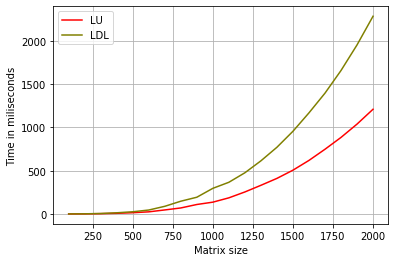

In [3]:
with open('lab/task3_lu_test.txt', 'r') as file_lu:
    with open('lab/task3_ldl_test.txt', 'r') as file_ldl:
        data_lu = [int(x) for x in file_lu.readline().split()]
        data_ldl = [int(x) for x in file_ldl.readline().split()]
        
        rng = [x for x in range(100, 2001, 100)]
        print(data_lu)
        print(data_ldl)
        print(rng)
        
        # multiple line plot
        plt.plot(rng, data_lu, color='red', label='LU')
        plt.plot(rng, data_ldl, color='olive', label='LDL')
        plt.legend()
        plt.xlabel("Matrix size")
        plt.ylabel("Time in miliseconds")
        axes = plt.gca()
        plt.grid(True)

Из-за оптимизаций эти методы должны работать приблизительно за одно время. Думаю, LDLt медленнее из-за извлечения корня из double. Асимптотика у алгоритмов одинаковая, возможно, разные константы.

**Задание 4**. Храним трехдиагональную матрицу как вектор размера $N$x$4$. Четвертый элемент нам нужен из-за выбора по столбцу. Каждый раз в прогонке выбираем между текушей строкой, и следующей(при прогонке сверху-вниз), т.е. выбираем максимум из первых ненулевых элементов строк. Если первый элемент следующей строки больше нашего, то при свапе в предыдущей строке появится четвертый элемент, и его нужно учитывать при последующем решении системы "снизу-вверх".

Для первой матрицы ответ:
$$
\begin{bmatrix}
     1 &      1 &      1 &      1\\
\end{bmatrix}^T
$$
Для второй матрицы ответ:
$$
\begin{bmatrix}
     1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 &      1 &      1\\
\end{bmatrix}^T
$$

**Задание 5**. Используем метод релаксации. Не храним лишние нули.

Алгоритм сходится, т.к. есть диагональное преобладание по строкам. Собственные значения меньше 1 по модулю. И норма матрицы меньше 1.

$
\\
{\scriptsize 
n=500 
\\ \tiny
\begin{bmatrix}
0.0000080159 & 0.001999967 & 0.001999967 & 0.001999967 & 0.001999967 & 0.001999967 & 0.001999967 & 0.001999967 & 0.00199967 & 0.00199967\end{bmatrix}
\\
\scriptsize 
n=1000
\\ \tiny
\begin{bmatrix}
0.000002002 & 0.000999996 & 0.000999996 & 0.000999996 & 0.000999996 & 0.000999996 & 0.000999996 & 0.000999996 & 0.000999996 & 0.000999996\end{bmatrix}
\\
\scriptsize 
n=2000
\\ \tiny
\begin{bmatrix}
0.00000050 & 0.00049999 & 0.00049999 & 0.00049999 & 0.00049999 & 0.00049999 & 0.00049999 & 0.00049999 & 0.00049999 & 0.00049999\end{bmatrix}
\\
\scriptsize 
n=4000
\\ \tiny
\begin{bmatrix}
0.000000125 & 0.000249999 & 0.00024999 & 0.00024999 & 0.00024999 & 0.00024999 & 0.00024999 & 0.0002499 & 0.00024999 & 0.00024999\end{bmatrix}
}
$

В файле репозитория task5_w_iters_dep.txt выведено количество сделанных операций в зависимости от размера матрицы и значения параметра w в формате n w iters, где n - размер матрицы, w - параметр, iters - количество сделанных итераций. В нашем случае для всех размеров матрицы количество итераций минимально, когда параметр близок к единице. (чем ближе к 1, тем быстрее сходится).